In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from system import *

# creating the star objects

st1 = star([1.0,0,0],[0.0,2*np.pi,1])

st2 = star([2.0,0.0,0],[0.0,2*np.pi,1])

st3 = star([0.5,0.0,0],[0.0,2*np.pi,1])

st4 = star([3.0,0.0,0],[0.0,2*np.pi,1])

st_list = [st1,st2,st3,st4]

In [16]:
%matplotlib inline

tf = 100
dt = 0.001
M = 100

test_system = system3d(st_list, M)

test_system.iterate(tf,dt)

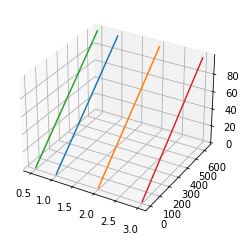

In [17]:
ax = plt.axes(projection='3d')
for i in range(len(st_list)):
    ax.plot(st_list[i].r[:,0],st_list[i].r[:,1],st_list[i].r[:,2])

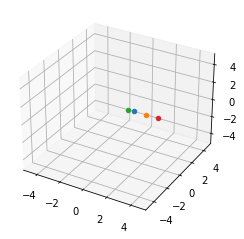

KeyboardInterrupt: 

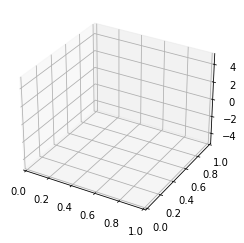

In [12]:
# plotting the 3D model
test_system.plot([-5,5],[-5,5],[-5,5], tf, dt)